In [1]:
import sys
#!{sys.executable} -m pip install sklearn
import numpy as np
import math
from matplotlib import pyplot as plt
import matplotlib
import random
import os
from matplotlib import animation
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from scipy import spatial
from IPython.display import HTML
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import (RBF, Matern, RationalQuadratic, ExpSineSquared, DotProduct, ConstantKernel)

import importlib
import scripts.theodolite_function as tfu
import scripts.theodolite_utils as tfuu
tfu = importlib.reload(tfu)
from scipy.interpolate import splprep, splev
from scipy import interpolate
import seaborn as sns
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
from scipy.spatial.transform import Rotation as R
import scripts.gp_prediction_utils as GPf
GPf = importlib.reload(GPf)
import GPy

Failed to load Python extension for LZ4 support. LZ4 compression will not be available.


In [3]:
# Switch values if necessary 1 11 2021
#Dist_prism_12 = 1.0398341231585624*1000
#Dist_prism_13 = 0.818424700118086*1000
#Dist_prism_23 = 0.8806156053859284*1000
#Dist_GPS_12 = 0.835637436093363*1000
#Dist_GPS_13 = 0.7812173648662254*1000
#Dist_GPS_23 = 0.5166745729506486*1000

# 26 11 2021
#Dist_prism_12 = 1.03688797895733
#Dist_prism_13 = 0.822536135483593
#Dist_prism_23 = 0.8783765747673403
#Dist_GPS_12 = 0.7828618536473139
#Dist_GPS_13 = 0.8394208131018045
#Dist_GPS_23 = 0.5176447366930409

# 31 01 2022
#Dist_prism_12 = 1.038854051807371
#Dist_prism_13 = 0.8202157646292075
#Dist_prism_23 = 0.879788333022114
#Dist_GPS_12 = 0.7830826912858335
#Dist_GPS_13 = 0.8418404054627937
#Dist_GPS_23 = 0.5172558618541933
     
# 03 02 2022
#Dist_prism_12 = 1.0403741344089559
#Dist_prism_13 = 0.8239475424257701
#Dist_prism_23 = 0.8766711748547112
#Dist_GPS_12 = 0.781661929058067
#Dist_GPS_13 = 0.8353981332464246
#Dist_GPS_23 = 0.5174987476948135

# 17 02 2022
Dist_prism_12 = 0.8882613537922258
Dist_prism_13 = 0.8262903370535766
Dist_prism_23 = 1.0377436460567973
Dist_GPS_12 = 0.7809786915630756
Dist_GPS_13 = 0.8378323585433202
Dist_GPS_23 = 0.5191788936274444   

In [27]:
tfuu = importlib.reload(tfuu)
path = "./data/prediction/TS/20211116/16-15-00/"
prefix = "GP-10-20"
P1 = np.array(tfuu.read_prediction_data_csv_file(path+prefix +"_1.csv"))
P2 = np.array(tfuu.read_prediction_data_csv_file(path+prefix +"_2.csv"))
P3 = np.array(tfuu.read_prediction_data_csv_file(path+prefix +"_3.csv"))

error_euclidian, T_prediction = GPf.error_calculation_eucli(P1, P2, P3, Dist_prism_12, Dist_prism_13, Dist_prism_23)

<IPython.core.display.Javascript object>


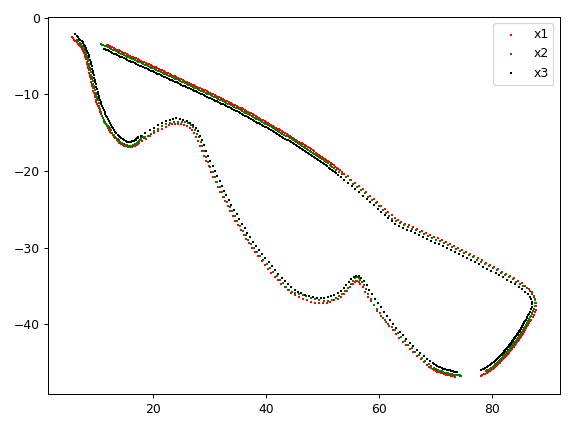

In [28]:
%matplotlib notebook
plt.figure(0)
coord = 0
start = 0
stop = -1
plt.scatter(-P1[start:stop,coord+1], P1[start:stop,coord+2], label="x1", marker="+", s = 1, color="red")
plt.scatter(-P2[start:stop,coord+1], P2[start:stop,coord+2], label="x2", marker="+", s = 1, color="green")
plt.scatter(-P3[start:stop,coord+1], P3[start:stop,coord+2], label="x3", marker="+", s = 1, color="black")

ax = plt.gca()
#ax.set_yscale('symlog')
plt.legend(loc='best')
#ax.set_ylim([0, 100])
plt.savefig("./figs/prediction_16-15-00.jpg")
plt.show()    

Mean e:  12.45141592062625 6.459716643356985 10.225264382638661
Variance e:  46.1267452726341 8.775795848214722 43.300454172256956


<IPython.core.display.Javascript object>


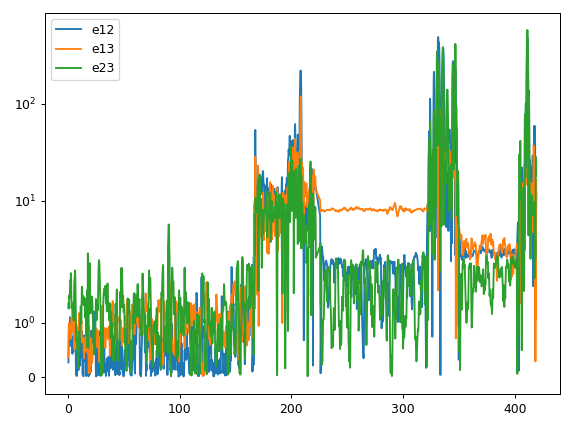

In [29]:
error_e = np.array(error_euclidian)
print("Mean e: ", np.mean(error_e[:,0]),np.mean(error_e[:,1]),np.mean(error_e[:,2]))
print("Variance e: ", np.std(error_e[:,0]),np.std(error_e[:,1]),np.std(error_e[:,2]))
plt.figure(0)
plt.plot(T_prediction, error_e[:,0], label="e12")
plt.plot(T_prediction, error_e[:,1], label="e13")
plt.plot(T_prediction, error_e[:,2], label="e23")
ax = plt.gca()
ax.set_yscale('symlog')
plt.legend(loc='best')
#ax.set_ylim([0, 0.02])
plt.show()

12.45156781656469 6.45481078683063 10.221438874012204
46.13785829311611 8.775063774974846 43.3105360237982


<IPython.core.display.Javascript object>


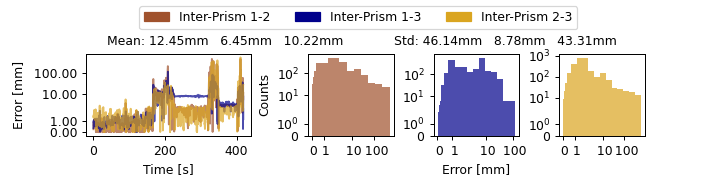

 /home/norlab/python-env/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning:`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
 /home/norlab/Repo_git/code_publication_IROS2022_MaximeVaidis/scripts/theodolite_plot_function.py:1317: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


In [30]:
%matplotlib notebook
import scripts.theodolite_plot_function as ptfu
ptfu = importlib.reload(ptfu)
start = 0
stop = -1
save_fig = True
name_file = "./figs/16-15-00.jpg"
ptfu.subplot_prisms_error_gt(T_prediction[start:stop], T_prediction[start:stop], T_prediction[start:stop], error_e[start:stop,0], error_e[start:stop,1], error_e[start:stop,2], save_fig, name_file)